In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
import io
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy


In [32]:
%%writefile stream.py
import streamlit as st

from sklearn import datasets
st.title("stock prediction and recommendation")
st.write(""" """)
bank_name=st.selectbox("select the bank",["HDFC","DHANBANK","KOTAK"])
st.write(bank_name)



Overwriting stream.py


In [29]:
!streamlit run stream.py & npx localtunnel --port 8501

/bin/bash: streamlit: command not found
npx: installed 22 in 3.807s
your url is: https://slow-hats-send-34-125-51-248.loca.lt
^C


In [33]:
from google.colab import files
uploaded=files.upload()

Saving NSE_BANKING_SECTOR.csv to NSE_BANKING_SECTOR (3).csv


In [34]:
df = pd.read_csv(io.BytesIO(uploaded['NSE_BANKING_SECTOR.csv']))

In [35]:
df.head()

,DATE,SYMBOL,SERIES,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
0,2016-01-01,HDFC,EQ,1263.75,1261.00,1266.90,1250.65,1257.80,1258.45,1258.39,676161,8.508751e+13,13230,308262,0.4559
1,2016-01-04,HDFC,EQ,1258.45,1250.00,1253.90,1212.05,1217.15,1216.70,1227.55,1995329,2.449371e+14,78529,1360507,0.6818
2,2016-01-05,HDFC,EQ,1216.70,1229.90,1233.45,1206.50,1208.15,1209.40,1219.50,2325929,2.836464e+14,109820,1644980,0.7072
3,2016-01-06,HDFC,EQ,1209.40,1209.60,1220.75,1202.40,1207.55,1209.30,1210.81,2746330,3.325286e+14,96546,2001431,0.7288
4,2016-01-07,HDFC,EQ,1209.30,1198.85,1203.55,1175.00,1176.35,1179.45,1186.35,1780298,2.112055e+14,60151,1172564,0.6586


In [36]:
df.isnull().sum()

DATE                  0
SYMBOL                0
SERIES                0
PREV CLOSE            0
OPEN                  0
HIGH                  0
LOW                   0
LAST                  0
CLOSE                 0
VWAP                  0
VOLUME                0
TURNOVER              0
TRADES                0
DELIVERABLE VOLUME    0
%DELIVERBLE           0
dtype: int64

In [37]:
df.groupby(['SYMBOL']).size()

SYMBOL
AUBANK         962
AXISBANK      1337
BANDHANBNK     784
BANKBARODA    1337
BANKINDIA     1337
CANBK         1337
CENTRALBK     1337
CSBBANK        370
CUB           1337
DCBBANK       1337
DHANBANK      1297
EQUITASBNK     141
FEDERALBNK    1337
HDFC          1337
ICICIBANK     1337
IDBI          1337
IDFCBANK       752
IDFCFIRSTB     585
INDIANB       1337
INDUSINDBK    1337
IOB           1337
J&KBANK       1337
KARURVYSYA    1337
KOTAKBANK     1337
KTKBANK       1337
MAHABANK      1337
PNB           1337
PSB           1337
RBLBANK       1173
SBIN          1337
SOUTHBANK     1337
SURYODAY        41
UCOBANK       1337
UJJIVANSFB     364
UNIONBANK     1337
YESBANK       1337
dtype: int64

In [38]:
names=df['SYMBOL'].unique()

In [39]:
len(names)

36

In [40]:
x=df.iloc[:,4:8].values
y=df.iloc[:,8:9]
x
y


,CLOSE
0,1258.45
1,1216.70
2,1209.40
3,1209.30
4,1179.45
...,...
41226,14.55
41227,16.60
41228,15.95
41229,15.60


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=df['SYMBOL'])

In [42]:
df.shape


(41231, 15)

In [43]:
x_train.shape

(32984, 4)

In [44]:
x_test.shape

(8247, 4)

In [45]:
y_test.shape

(8247, 1)

In [46]:
df.corr()

,PREV CLOSE,OPEN,HIGH,LOW,LAST,CLOSE,VWAP,VOLUME,TURNOVER,TRADES,DELIVERABLE VOLUME,%DELIVERBLE
PREV CLOSE,1.000000,0.999798,0.999678,0.999651,0.999557,0.999561,0.999679,-0.081996,0.360921,0.289422,-0.042003,0.206897
OPEN,0.999798,1.000000,0.999861,0.999857,0.999749,0.999753,0.999873,-0.081879,0.361341,0.289689,-0.041950,0.206705
HIGH,0.999678,0.999861,1.000000,0.999778,0.999887,0.999889,0.999941,-0.080811,0.365065,0.293123,-0.041257,0.204781
LOW,0.999651,0.999857,0.999778,1.000000,0.999860,0.999867,0.999925,-0.082713,0.358654,0.286303,-0.042558,0.207931
LAST,0.999557,0.999749,0.999887,0.999860,1.000000,0.999995,0.999950,-0.081611,0.362332,0.289871,-0.041801,0.206182
CLOSE,0.999561,0.999753,0.999889,0.999867,0.999995,1.000000,0.999957,-0.081656,0.362266,0.289755,-0.041840,0.206178
VWAP,0.999679,0.999873,0.999941,0.999925,0.999950,0.999957,1.000000,-0.081714,0.362112,0.289812,-0.041886,0.206135
VOLUME,-0.081996,-0.081879,-0.080811,-0.082713,-0.081611,-0.081656,-0.081714,1.000000,0.460406,0.603049,0.834683,-0.224647
TURNOVER,0.360921,0.361341,0.365065,0.358654,0.362332,0.362266,0.362112,0.460406,1.000000,0.888915,0.384312,-0.132199
TRADES,0.289422,0.289689,0.293123,0.286303,0.289871,0.289755,0.289812,0.603049,0.888915,1.000000,0.435939,-0.197513


In [47]:
minmax_x= MinMaxScaler()
minmax_x = minmax_x.fit_transform(x)
print (minmax_x)


[[0.43825125 0.43650231 0.43973246 0.43859066]
 [0.43441322 0.43200567 0.42610829 0.4243607 ]
 [0.42740008 0.42493212 0.42414937 0.42121016]
 ...
 [0.00411716 0.00408156 0.00388254 0.00386817]
 [0.00383803 0.00385673 0.0037237  0.00379816]
 [0.00371592 0.00375296 0.00356487 0.00360562]]


In [48]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import LSTM , GRU 
from keras.layers import Dense , BatchNormalization , Dropout , Activation
model=keras.Sequential()
model.add(layers.Embedding(input_dim=4, output_dim=1))
model.add(layers.LSTM(128))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 1)           4         
                                                                 
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 67,854
Trainable params: 67,854
Non-trainable params: 0
_________________________________________________________________


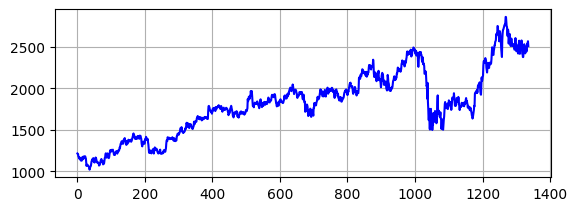

In [49]:
from keras.layers import LSTM , GRU 
from keras.layers import Dense , BatchNormalization , Dropout , Activation
def graph(bank):
  j=0;i=0
  for r in range(41231):
    if(df['SYMBOL'][r]==bank):
      if(j==0):
        i=r;
      j=r;
  x=df.iloc[i:j,4:8]
  y=df.iloc[i:j,8:9]
  #print(x)
  minmax_x= MinMaxScaler()
  minmax_x = minmax_x.fit_transform(x)
  #print (minmax_x)
  plt.subplot(212)
  #closing=df[df['SYMBOL']==bank]
  #closing=closing['CLOSE'].values
  plt.grid(True)
  plt.plot(y,color='b')
  plt.xlabel=('stock')
  plt.ylabel=('time')
  plt.show()
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
  # print(x_train)
  # print(y_train)
  # print(y_test)
  # print(y_test)
  

  
graph(input("name of the bank "))

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  CLOSE   No. Observations:                 1337
Model:                ARIMA(14, 1, 2)   Log Likelihood               -6630.298
Date:                Sat, 01 Apr 2023   AIC                          13294.596
Time:                        17:00:15   BIC                          13382.953
Sample:                             0   HQIC                         13327.703
                               - 1337                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4815      0.029     16.877      0.000       0.426       0.537
ar.L2         -0.9852      0.027    -36.985      0.000      -1.037      -0.933
ar.L3         -0.1004      0.023     -4.318      0.0

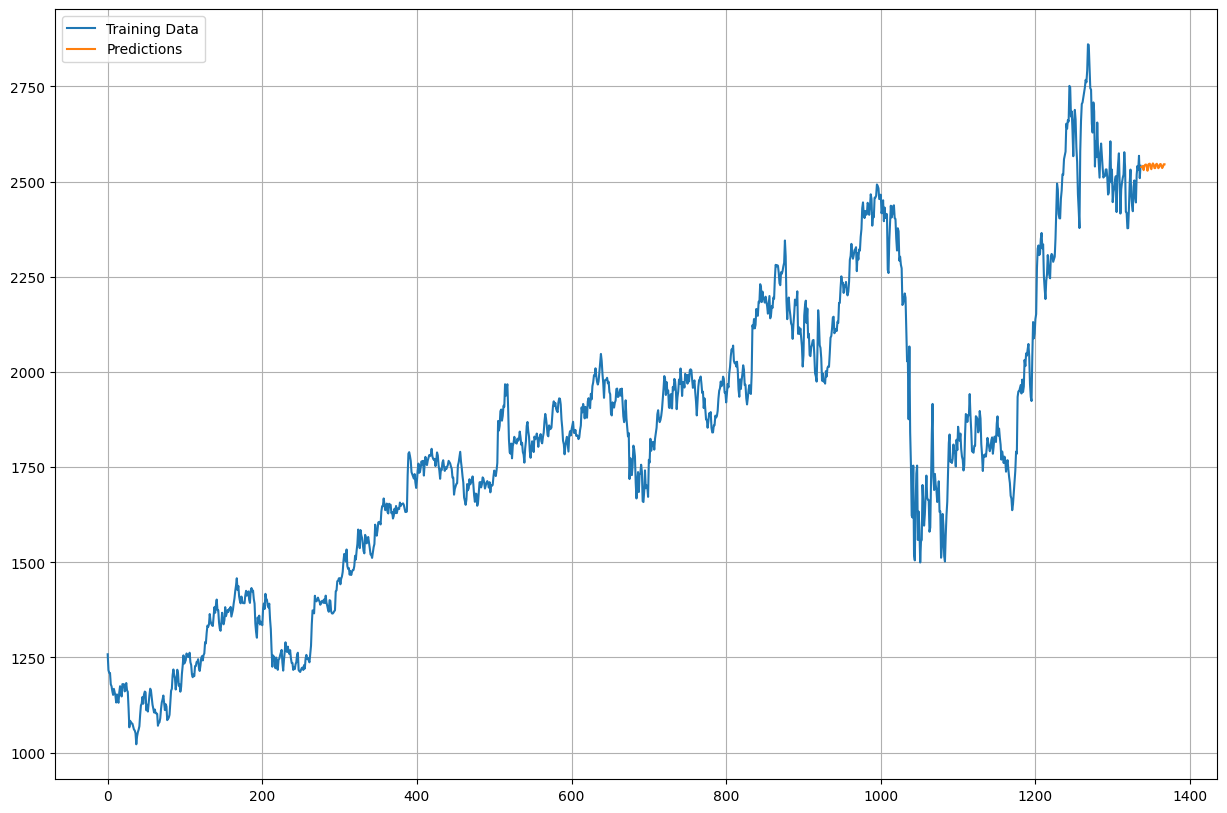

In [67]:
def graph2(bank):
  j=0;i=0
  for r in range(41231):
    if(df['SYMBOL'][r]==bank):
      if(j==0):
        i=r;
      j=r;
  x=df.iloc[i:j,4:8]
  y=df.iloc[i:j,8:9]
  #print(x)
  minmax_x= MinMaxScaler()
  minmax_x = minmax_x.fit_transform(x)
  bank_data = df[df['SYMBOL'] == bank]
  #plt.figure(figsize=(15, 10))
  #plt.plot(bank_data["DATE"], bank_data["CLOSE"])
  from statsmodels.tsa.seasonal import seasonal_decompose
  result = seasonal_decompose(bank_data["CLOSE"], 
                              model='multiplicative', period= 25)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
  
  #fig = plt.figure()  
  #fig = result.plot()  
  #fig.set_size_inches(15, 10)
  #pd.plotting.autocorrelation_plot(bank_data["CLOSE"])
  from statsmodels.graphics.tsaplots import plot_pacf
  #plot_pacf(bank_data["CLOSE"], lags = 100)
  p, d, q = 14, 1, 2
  from statsmodels.tsa.arima.model import ARIMA
  model = ARIMA(bank_data["CLOSE"], order=(p,d,q))  
  fitted = model.fit()  
  print(fitted.summary())
  pred = fitted.predict(start=len(bank_data), end=len(bank_data)+30)
  pred
  bank_data["CLOSE"].plot(legend=True, label="Training Data", figsize=(15, 10))
  pred.plot(legend=True, label="Predictions")
  plt.grid(True)
graph2('HDFC')

In [57]:
import pickle
filename='predic_model.sav'
pickle.dump(model,open(filename,'wb'))

In [59]:
loaded_model=pickle.load(open('predic_model.sav','rb'))

In [64]:
loaded_model

In [69]:
def graph2(bank):

  bank_data = df[df['SYMBOL'] == bank]
  pred = loaded_model.predict(start=len(bank_data), end=len(bank_data)+30)
  pred
  bank_data["CLOSE"].plot(legend=True, label="Training Data", figsize=(15, 10))
  pred.plot(legend=True, label="Predictions")
  plt.grid(True)
graph2('HDFC')

TypeError: ignored